***Question: How to code Classification Algorithm(Logistic Regression) using sklearn.***

***Import required libraries***

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import matplotlib.colors

***Select color map***

In [19]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

***create data by using make blobs***

In [20]:
x,y=make_blobs(n_samples=1000,centers=2,n_features=2,random_state=0)
print(x.shape,y.shape)

(1000, 2) (1000,)


***Plot the data***

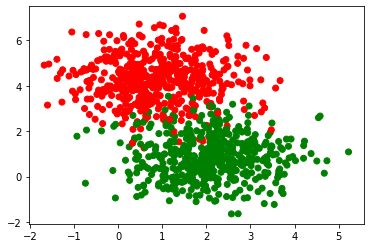

In [21]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=my_cmap)

***split the data***

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 2) (250, 2) (750,) (250,)


***Select model***

In [23]:
model=linear_model.LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

***Find y_pred and y_proba***

In [ ]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)
print(y_pred)
print(y_pred_proba)

***Accuracy Score***

In [26]:
ascore=accuracy_score(y_test,y_pred)
print(ascore)

0.964


***Coefficient and Intercept***

In [27]:
coef=model.coef_
intercept=model.intercept_
print(coef)
print(intercept)

[[ 0.77523549 -2.96913894]]
[6.48886506]


***Create a Decision Boundary***

In [33]:
x1min, x1max = x_test[:,0].min()-.5, x_test[:,0].max()+.5
x2min, x2max = x_test[:,1].min()-.5, x_test[:,1].max()+.5
xvals = np.arange(x1min,x1max,.2)
yvals = np.arange(x2min,x2max,.2)
xx, yy = np.meshgrid(xvals,yvals)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

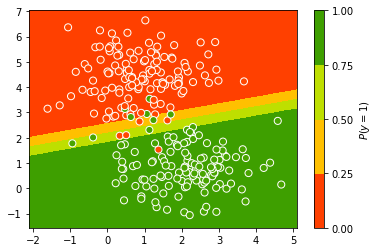

In [36]:
f, ax = plt.subplots()
contour = ax.contourf(xx, yy, probs,3, cmap=my_cmap,
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_test[:,0], x_test[:, 1], c=y_test, s=50,
           cmap=my_cmap, vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
